In [3]:
import pandas as pd
import functions

%reload_ext autoreload
%autoreload 2

In [4]:
df_clients = pd.read_csv("../data/raw/df_final_demo.csv")
df_clients = functions.rename_client_columns(df_clients)

df_clients.dropna(inplace=True)

df_clients.to_csv("../data/clean/clients.csv", index=False)

Index(['id_x', 'tenure_years', 'tenure_months', 'age', 'gender',
       'num_accounts', 'balance', 'calls_6_months', 'logons_6_months', 'id_y',
       'client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')


<Axes: >

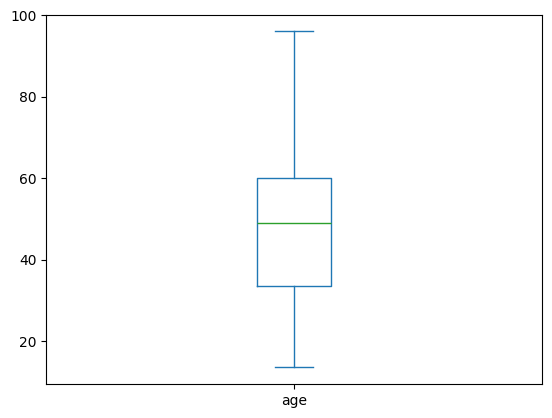

In [ ]:
df_visits = pd.read_csv("../data/clean/visits.csv")

df_final = pd.merge(df_clients, df_visits, left_on="id", right_on="client_id", how="inner")

df_final.head()

top_50_visitors = df_final.groupby(["visitor_id"]).size().sort_values(ascending=False).head(50)

# df_final[df_final["visitor_id"] in top_50_visitors]

clients_top_50 = df_final[df_final["visitor_id"].isin(top_50_visitors.keys())]

print(clients_top_50.columns)

#df_final["age"].plot(kind="hist", bins=range(0, 120, 10), rwidth=0.8)
df_final["age"].plot(kind="box")

<Axes: >

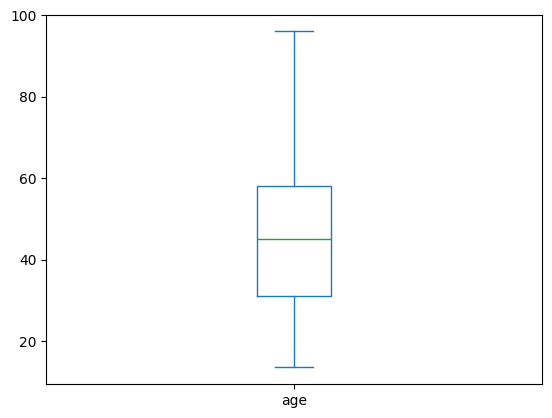

In [79]:
tenure_years = df_final["tenure_years"].value_counts()
top_tenure_years = tenure_years.head(10)

df_final[df_final["tenure_years"].isin(top_tenure_years.keys())]["age"].plot(kind="box")


In [ ]:
df_experiments = pd.read_csv("../data/raw/df_final_experiment_clients.csv")
df_experiments = functions.rename_experiment_columns(df_experiments)

df_experiments.fillna({"variation": "Control"}, inplace=True)

df_experiments.index.name = "id"
df_experiments.index += 1
df_experiments.to_csv("../data/clean/experiments.csv")

df_experiments.head()

,client_id,variation
id,,
1,9988021,Test
2,8320017,Test
3,4033851,Control
4,1982004,Test
5,9294070,Control
